<a href="https://colab.research.google.com/github/jafetimbre/ms-school-stuff/blob/master/image-processing/object-size-measure/measure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from urllib.request import urlopen
import matplotlib.pyplot as plt

[YouTube](https://youtu.be/lbgl2u6KrDU)

In [2]:
def show_im(im, size=(8,8)):
    plt.figure(figsize = size)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

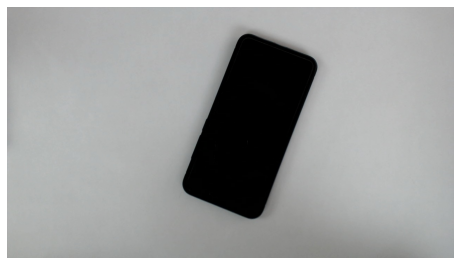

In [3]:
url = f"https://raw.githubusercontent.com/jafetimbre/ms-school-stuff/master/image-processing/object-size-measure/res/phone.jpg"
req = urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
phone_img = cv2.imdecode(arr, -1)

show_im(phone_img)

In [4]:
class HomogeneousBgDetector():
    def __init__(self):
        pass

    def detect_objects(self, frame):
        # Convert Image to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Create a Mask with adaptive threshold
        mask = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 19, 5)

        # Find contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        #cv2.imshow("mask", mask)
        objects_contours = []

        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > 2000:
                #cnt = cv2.approxPolyDP(cnt, 0.03*cv2.arcLength(cnt, True), True)
                objects_contours.append(cnt)

        return objects_contours

    # def get_objects_rect(self):
    #     box = cv2.boxPoints(rect)  # cv2.boxPoints(rect) for OpenCV 3.x
    #     box = np.int0(box)

In [5]:
detector = HomogeneousBgDetector()

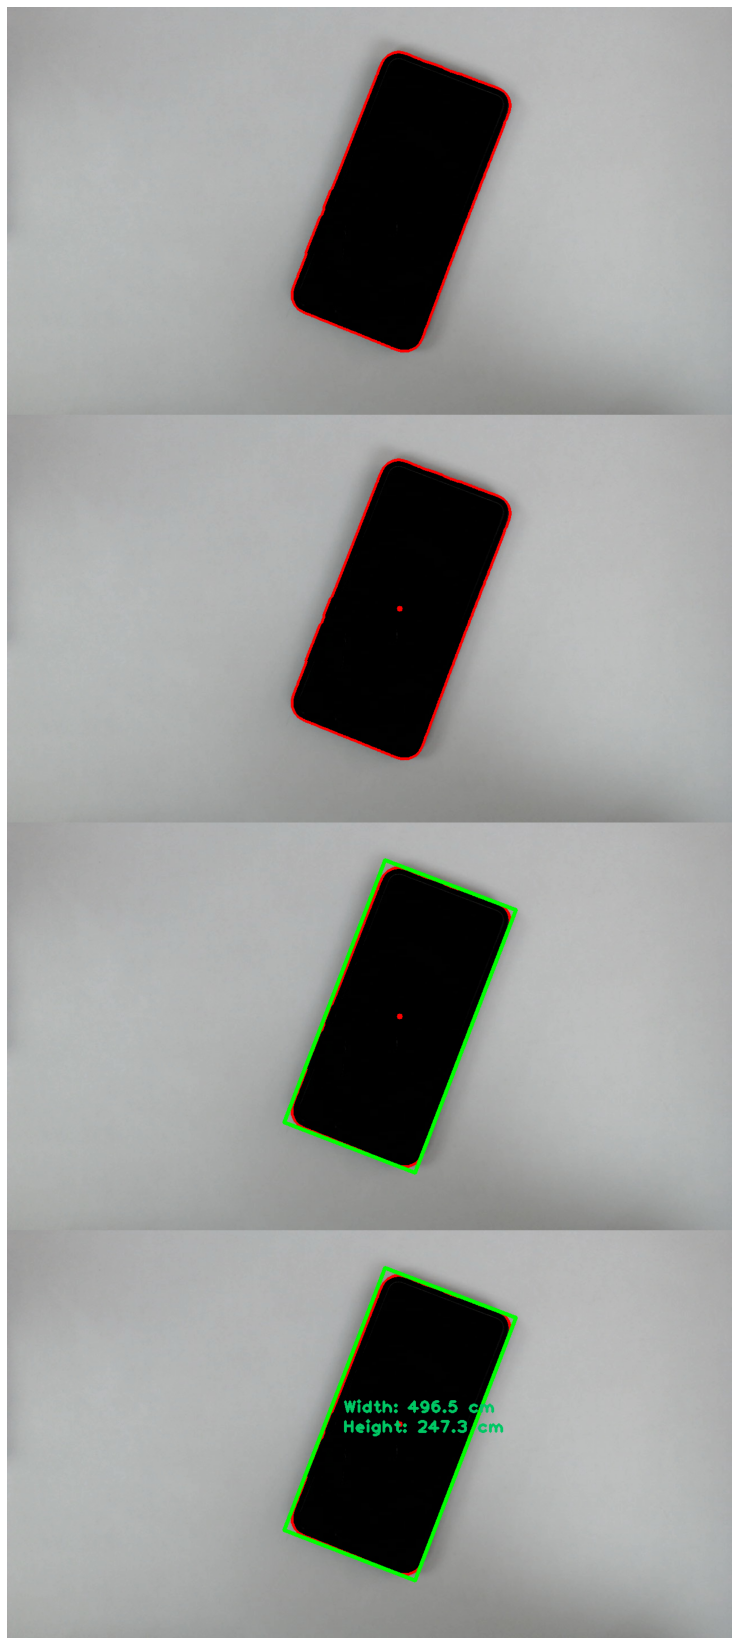

In [6]:
img = phone_img.copy()

contours = detector.detect_objects(phone_img)

for cnt in contours:
    # geting the usable area
    rect = cv2.minAreaRect(cnt)
    (x, y), (w, h), angle = rect

    # Get the border box
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    # draw contour
    cv2.polylines(img, [cnt], True, (0, 0, 255), 3)

    img1 = img.copy()
    # draw middle
    cv2.circle(img1, (int(x), int(y)), 5, (0, 0, 255), -1)

    img2 = img1.copy()
    # draw rect border
    cv2.polylines(img2, [box], True, (0, 255, 0), 5)

    img3 = img2.copy()
    # draw text
    cv2.putText(img3, "Width: {} cm".format(round(w, 1)), (int(x - 100), int(y - 20)), cv2.FONT_HERSHEY_PLAIN, 2, (100, 200, 0), 4)
    cv2.putText(img3, "Height: {} cm".format(round(h, 1)), (int(x - 100), int(y + 15)), cv2.FONT_HERSHEY_PLAIN, 2, (100, 200, 0), 4)


display = np.vstack((img, img1, img2, img3))
show_im(display, (16, 30))


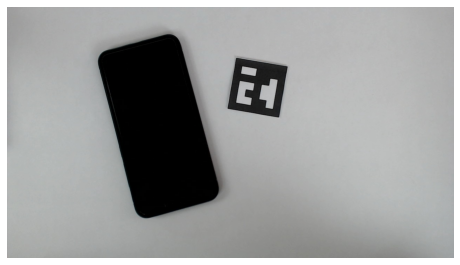

In [7]:
url = f"https://raw.githubusercontent.com/jafetimbre/ms-school-stuff/master/image-processing/object-size-measure/res/phone_aruco_marker.jpg"
req = urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
aruco_img = cv2.imdecode(arr, -1)

show_im(aruco_img)

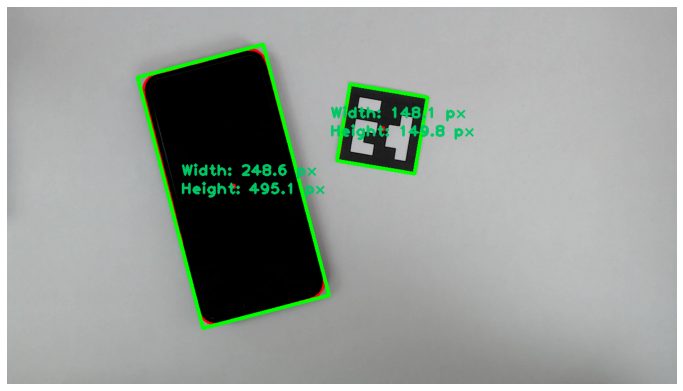

In [8]:
img = aruco_img.copy()

contours = detector.detect_objects(img)

for cnt in contours:
    rect = cv2.minAreaRect(cnt)
    (x, y), (w, h), angle = rect

    box = cv2.boxPoints(rect)
    box = np.int0(box)

    cv2.polylines(img, [cnt], True, (0, 0, 255), 3)

    cv2.circle(img, (int(x), int(y)), 5, (0, 0, 255), -1)

    cv2.polylines(img, [box], True, (0, 255, 0), 5)

    cv2.putText(img, "Width: {} px".format(round(w, 1)), (int(x - 100), int(y - 20)), cv2.FONT_HERSHEY_PLAIN, 2, (100, 200, 0), 4)
    cv2.putText(img, "Height: {} px".format(round(h, 1)), (int(x - 100), int(y + 15)), cv2.FONT_HERSHEY_PLAIN, 2, (100, 200, 0), 4)

show_im(img, (12, 16))

In [9]:
# Init the aruco params
parameters = cv2.aruco.DetectorParameters_create()
aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_5X5_50)

In [10]:
img = aruco_img.copy()
# Getting the marker position
corners, _, _ = cv2.aruco.detectMarkers(img, aruco_dict, parameters=parameters)

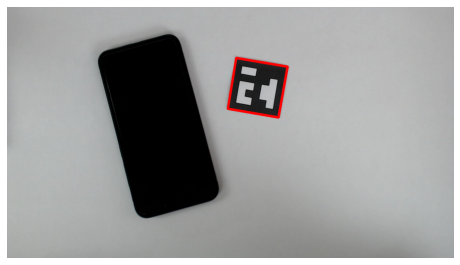

In [11]:
int_corners = np.int0(corners)
cv2.polylines(img, int_corners, True, (0, 0, 255), 5)

show_im(img)

In [12]:
# compute the aruco marker dims
aruco_perimeter = cv2.arcLength(corners[0], True)
print(aruco_perimeter)

590.5354766845703


In [13]:
# compute a ratio for pixel->cm transform
pixel_cm_ratio = aruco_perimeter / 20

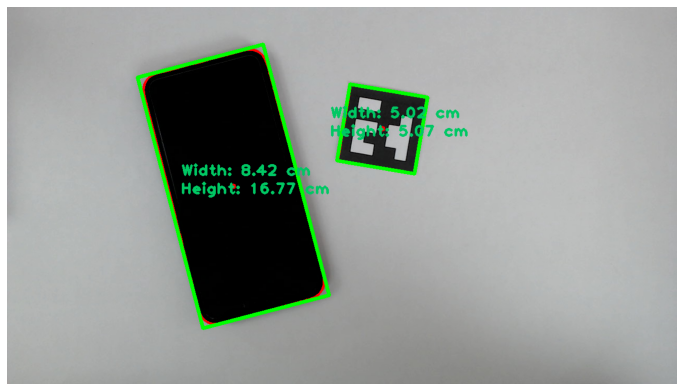

In [14]:
img = aruco_img.copy()

contours = detector.detect_objects(img)

for cnt in contours:
    rect = cv2.minAreaRect(cnt)
    (x, y), (w, h), angle = rect

    # Compute with and height of the objects with the ratio
    object_width = w / pixel_cm_ratio
    object_height = h / pixel_cm_ratio

    box = cv2.boxPoints(rect)
    box = np.int0(box)

    cv2.polylines(img, [cnt], True, (0, 0, 255), 3)

    cv2.circle(img, (int(x), int(y)), 5, (0, 0, 255), -1)

    cv2.polylines(img, [box], True, (0, 255, 0), 5)

    cv2.putText(img, "Width: {} cm".format(round(object_width, 2)), (int(x - 100), int(y - 20)), cv2.FONT_HERSHEY_PLAIN, 2, (100, 200, 0), 4)
    cv2.putText(img, "Height: {} cm".format(round(object_height, 2)), (int(x - 100), int(y + 15)), cv2.FONT_HERSHEY_PLAIN, 2, (100, 200, 0), 4)

show_im(img, (12, 16))